In [10]:
import json
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from evaluate_util import get_metrics
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
experiments_of_interest = ["2024_08_29__14_28_57_topunet_newlog_test/"]
experiments_labels = ["topunet", "topunet", "topological loss, very narrow"]
experiments_colors = [("b", "cornflowerblue"), ("green", "limegreen"), ("orangered", "coral")]
exp_paths = ["experiments/" + name for name in experiments_of_interest]

In [19]:
dataset="validation"

with open(exp_paths[0] + dataset + "_dice.pickle", "rb") as handle:
    dices = pickle.load(handle)

with open(exp_paths[0] + dataset + "_hausdorff.pickle", "rb") as handle:
    hauss = pickle.load(handle)

with open(exp_paths[0] + dataset + "_diameters.pickle", "rb") as handle:
    diameters = pickle.load(handle)

cdr_label = np.array([diameters["label"][0][i] / diameters["label"][1][i] for i in range(len(diameters["label"][0]))])
cdr_pred = np.array([diameters["pred"][0][i] / diameters["pred"][1][i] for i in range(len(diameters["label"][0]))])

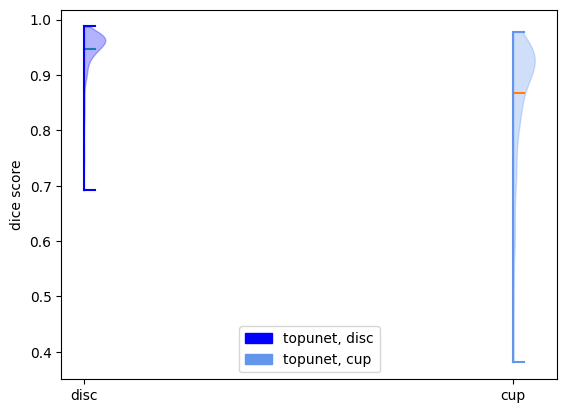

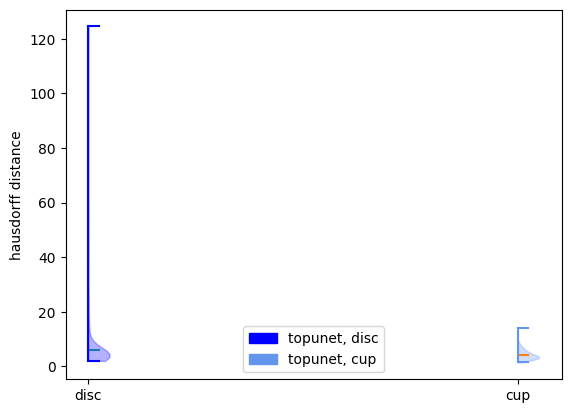

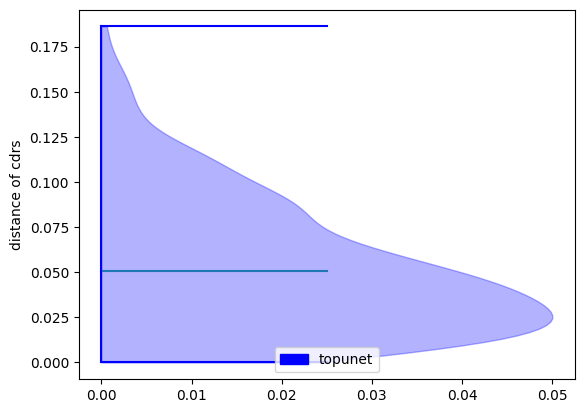

In [21]:
patches = []
labels = []
width = 0.1
shift_factor = width*1.1

fig = plt.figure()
ax = fig.add_subplot()

for i in range(len(experiments_of_interest)):
    violin = ax.violinplot(dices[1],
                            positions = [0 + shift_factor*i],
                            widths=width,
                            showmeans=True,
                            side="high")

    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][0])
        pc.set_edgecolor(experiments_colors[i][0])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][0])
    patches.append(mpatches.Patch(color=experiments_colors[i][0]))
    labels.append(experiments_labels[i] + ", disc")

    violin = ax.violinplot(dices[0],
                            positions = [1 + i*shift_factor],
                            widths=width,
                            showmeans=True,
                            side="high")
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][1])
        pc.set_edgecolor(experiments_colors[i][1])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][1])
    patches.append(mpatches.Patch(color=experiments_colors[i][1]))
    labels.append(experiments_labels[i] + ", cup")
ax.set_xticks([0, 1], ["disc", "cup"])
plt.ylabel("dice score")
plt.legend(patches, labels, loc=8) # loc 4 ... lower center
plt.show()

patches = []
labels = []
width = 0.1
shift_factor = width*1.1

fig = plt.figure()
ax = fig.add_subplot()

for i in range(len(experiments_of_interest)):
    violin = ax.violinplot(hauss[1],
                            positions = [0 + shift_factor*i],
                            widths=width,
                            showmeans=True,
                            side="high")

    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][0])
        pc.set_edgecolor(experiments_colors[i][0])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][0])
    patches.append(mpatches.Patch(color=experiments_colors[i][0]))
    labels.append(experiments_labels[i] + ", disc")

    violin = ax.violinplot(hauss[0],
                            positions = [1 + i*shift_factor],
                            widths=width,
                            showmeans=True,
                            side="high")
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][1])
        pc.set_edgecolor(experiments_colors[i][1])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][1])
    patches.append(mpatches.Patch(color=experiments_colors[i][1]))
    labels.append(experiments_labels[i] + ", cup")
ax.set_xticks([0, 1], ["disc", "cup"])
plt.ylabel("hausdorff distance")
plt.legend(patches, labels, loc=8) # loc 4 ... lower center
plt.show()

patches = []
labels = []
width = 0.1
shift_factor = width*1.1

fig = plt.figure()
ax = fig.add_subplot()

for i in range(len(experiments_of_interest)):
    violin = ax.violinplot(np.abs(cdr_label - cdr_pred),
                            positions = [0 + shift_factor*i],
                            widths=width,
                            showmeans=True,
                            side="high")

    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][0])
        pc.set_edgecolor(experiments_colors[i][0])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][0])
    patches.append(mpatches.Patch(color=experiments_colors[i][0]))
    labels.append(experiments_labels[i])
plt.ylabel("distance of cdrs")
plt.legend(patches, labels, loc=8) # loc 4 ... lower center
plt.show()